In [1]:
#Library Import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data set Import
df = pd.read_csv("Student Mental health.csv")

In [3]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df.shape

(101, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
df.dtypes

Timestamp                                       datetime64[ns]
Choose your gender                                      object
Age                                                    float64
What is your course?                                    object
Your current year of Study                              object
What is your CGPA?                                      object
Marital status                                          object
Do you have Depression?                                 object
Do you have Anxiety?                                    object
Do you have Panic attack?                               object
Did you seek any specialist for a treatment?            object
dtype: object

In [8]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [9]:
#Let us refine the names of some of the columns
df.rename(columns = {"Choose your gender":"Gender", "What is your course?":"Course", "Your current year of Study":"Year of Study", "What is your CGPA?":"CGPA", "Do you have Depression?":"Depressed", "Do you have Anxiety?":"Anxious", "Do you have Panic attack?":"Panic", "Did you seek any specialist for a treatment?":"Seeking Treatment"}, inplace=True)

In [10]:
df.columns #checking to confirm changes made

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depressed', 'Anxious', 'Panic', 'Seeking Treatment'],
      dtype='object')

In [11]:
#Let's check the different unique values in the year of study
df["Year of Study"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [12]:
# Convert 'Year of Study' column to lowercase to ensure case-insensitive grouping
df['Year of Study'] = df['Year of Study'].str.lower()

# Group by the 'Year of Study' column and take the first value of each group
collapsed_df = df.groupby('Year of Study').first().reset_index()

df['Year of Study'].unique() #checking to confirm changes

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [13]:
df[df.duplicated()]

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depressed,Anxious,Panic,Seeking Treatment


#### *There doesn't seem to be any dulplicate values in the data set*

In [14]:
df.isnull().sum() #check for missing values

Timestamp            0
Gender               0
Age                  1
Course               0
Year of Study        0
CGPA                 0
Marital status       0
Depressed            0
Anxious              0
Panic                0
Seeking Treatment    0
dtype: int64

In [15]:
df.dropna(axis=0, inplace=True, how="any") #dropping all missing values

In [16]:
df.isnull().sum() #checking to confirm deletion of missing values

Timestamp            0
Gender               0
Age                  0
Course               0
Year of Study        0
CGPA                 0
Marital status       0
Depressed            0
Anxious              0
Panic                0
Seeking Treatment    0
dtype: int64

<Axes: title={'center': 'Count of the Various ages of students'}, xlabel='Age', ylabel='count'>

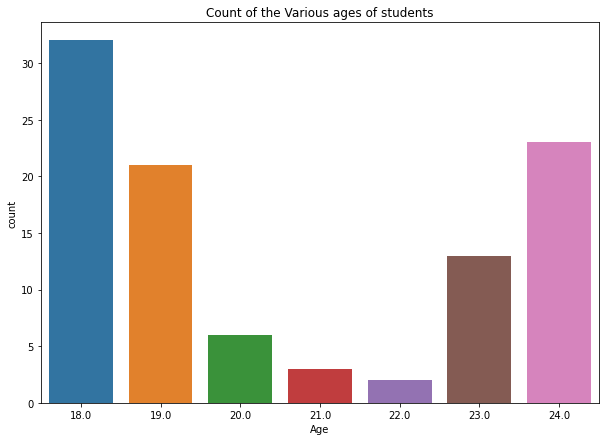

In [17]:
plt.figure(figsize=(10,7))
plt.title("Count of the Various ages of students")
sns.countplot(x='Age', data=df)

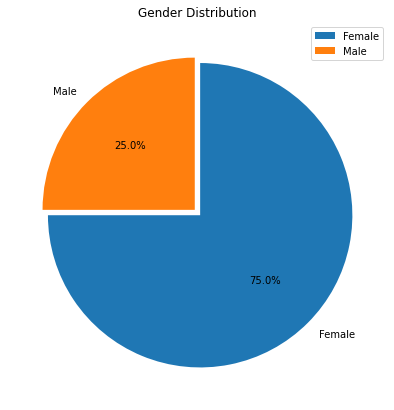

In [18]:
plt.figure(figsize=(10,7))
plt.title("Gender Distribution")
plt.pie(df["Gender"].value_counts(), explode=(0.025,0.025), labels=df["Gender"].value_counts().index,autopct='%1.1f%%', startangle=180)
plt.legend()

<Axes: title={'center': 'Year of study distribution'}, xlabel='Year of Study', ylabel='count'>

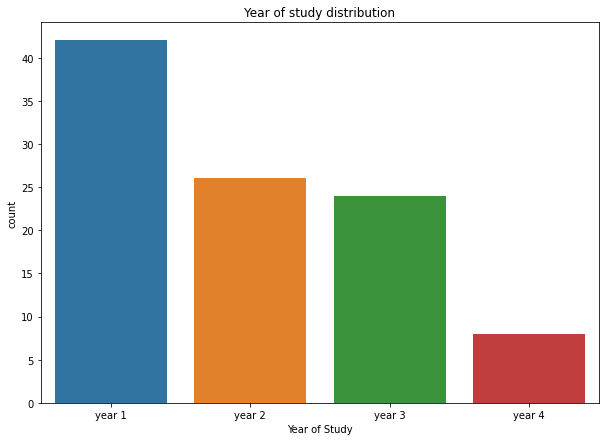

In [19]:
plt.figure(figsize=(10,7))
plt.title("Year of study distribution")
sns.countplot(x="Year of Study", data=df)

<Axes: title={'center': 'Student per year, distinguished by gender'}, xlabel='Year of Study', ylabel='count'>

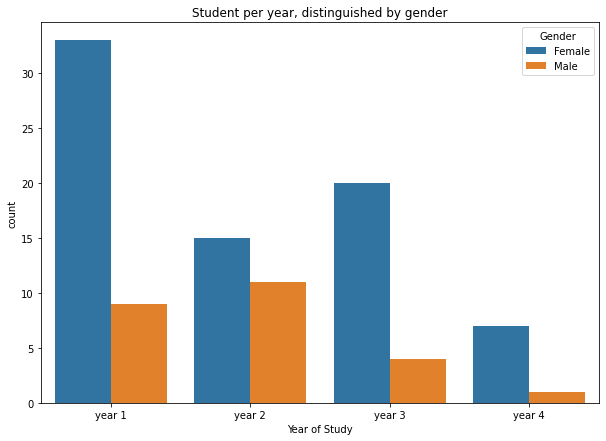

In [20]:
plt.figure(figsize=(10,7))
plt.title("Student per year, distinguished by gender")
sns.countplot(x="Year of Study", data=df, hue="Gender")

<Axes: title={'center': 'Students in different years of study filtered by anxiety'}, xlabel='Year of Study', ylabel='count'>

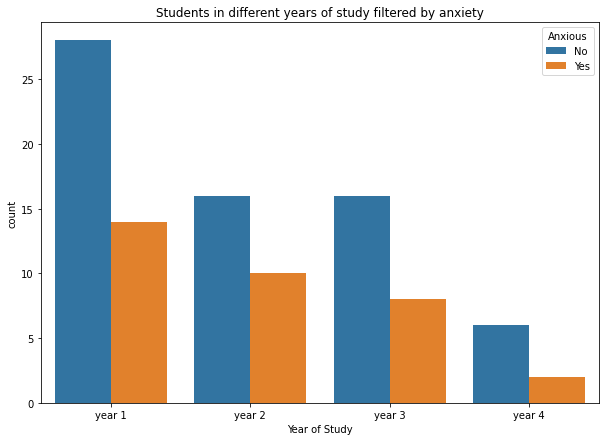

In [21]:
plt.figure(figsize=(10,7))
plt.title("Students in different years of study filtered by anxiety")
sns.countplot(x="Year of Study", data=df, hue="Anxious")

In [22]:
df.groupby(["Year of Study","Anxious"]).size()

Year of Study  Anxious
year 1         No         28
               Yes        14
year 2         No         16
               Yes        10
year 3         No         16
               Yes         8
year 4         No          6
               Yes         2
dtype: int64

Text(0.5, 1.0, 'Occurrences of students who are depressed by Year of Study')

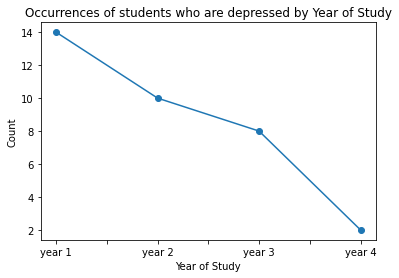

In [23]:
grouped = df.groupby(["Year of Study","Anxious"]).size()

anxious_yes = grouped.loc[:, "Yes"]

anxious_yes = anxious_yes.plot(kind="line", marker="o")

plt.xlabel("Year of Study")
plt.ylabel("Count")
plt.title("Occurrences of students who are depressed by Year of Study")

<Axes: title={'center': 'Students in different years of study filtered by depression'}, xlabel='Year of Study', ylabel='count'>

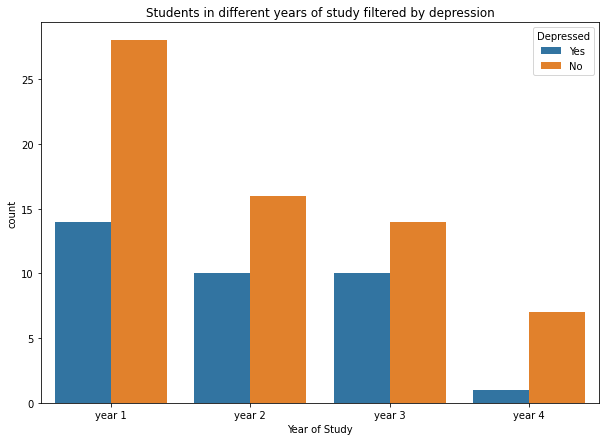

In [24]:
plt.figure(figsize=(10,7))
plt.title("Students in different years of study filtered by depression")
sns.countplot(x="Year of Study", data=df, hue="Depressed")

In [25]:
df.groupby(["Year of Study","Depressed"]).size()

Year of Study  Depressed
year 1         No           28
               Yes          14
year 2         No           16
               Yes          10
year 3         No           14
               Yes          10
year 4         No            7
               Yes           1
dtype: int64

Text(0.5, 1.0, 'Occurrences of students who are depressed by Year of Study')

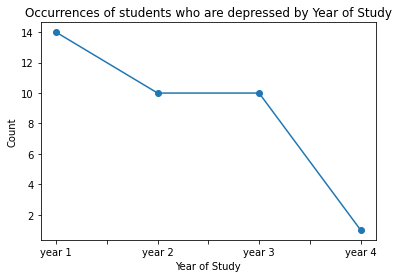

In [26]:
# Group by "Year of Study" and "Panic", then count occurrences
grouped = df.groupby(["Year of Study", "Depressed"]).size()

# Filter by "Panic" equals "Yes"
depressed_yes = grouped.loc[:, 'Yes']

# Plotting the line chart
depressed_yes.plot(kind='line', marker='o')

# Adding labels and title
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.title('Occurrences of students who are depressed by Year of Study')

<Axes: title={'center': 'Students in different years of study filtered by whether they have had panic attacks'}, xlabel='Year of Study', ylabel='count'>

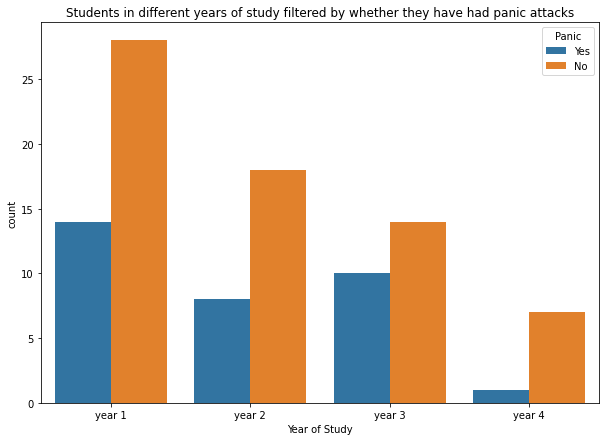

In [27]:
plt.figure(figsize=(10,7))
plt.title("Students in different years of study filtered by whether they have had panic attacks")
sns.countplot(x="Year of Study", data=df, hue="Panic")

In [28]:
df.groupby(["Year of Study","Panic"]).size()

Year of Study  Panic
year 1         No       28
               Yes      14
year 2         No       18
               Yes       8
year 3         No       14
               Yes      10
year 4         No        7
               Yes       1
dtype: int64

Text(0.5, 1.0, 'Occurrences of students who have panic attack by Year of Study')

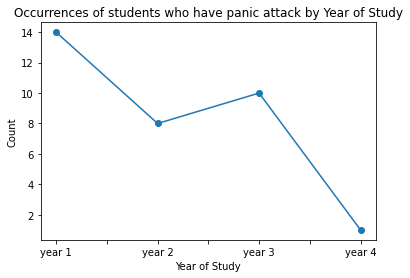

In [29]:
# Group by "Year of Study" and "Panic", then count occurrences
grouped = df.groupby(["Year of Study", "Panic"]).size()

# Filter by "Panic" equals "Yes"
panic_yes = grouped.loc[:, 'Yes']

# Plotting the line chart
panic_yes.plot(kind='line', marker='o')

# Adding labels and title
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.title('Occurrences of students who have panic attack by Year of Study')

<Axes: title={'center': 'Count of depressed student that seek treatment'}, xlabel='Depressed', ylabel='count'>

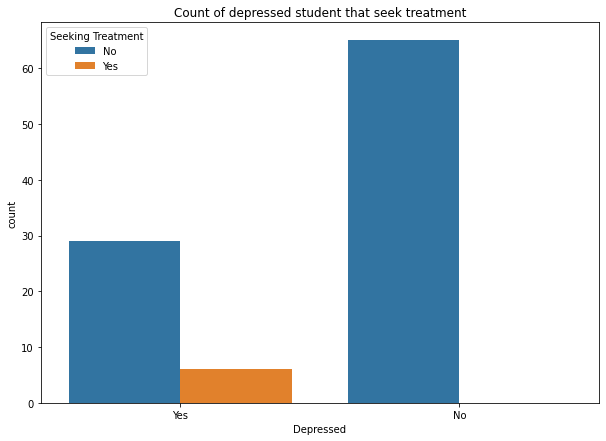

In [30]:
plt.figure(figsize=(10,7))
plt.title("Count of depressed student that seek treatment")
sns.countplot(x="Depressed", data=df, hue='Seeking Treatment')

In [31]:
df.groupby(["Depressed","Seeking Treatment"]).size() #numeric representation of the chart above, showing the number of depressed student and those who are seeking treatment

Depressed  Seeking Treatment
No         No                   65
Yes        No                   29
           Yes                   6
dtype: int64

<Axes: title={'center': 'Count of anxious student that seek treatment'}, xlabel='Panic', ylabel='count'>

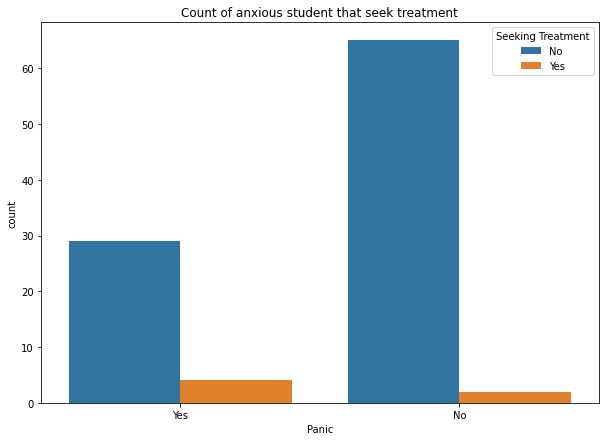

In [32]:
plt.figure(figsize=(10,7))
plt.title("Count of anxious student that seek treatment")
sns.countplot(x="Panic", data=df, hue='Seeking Treatment')

In [33]:
df.groupby(["Panic","Seeking Treatment"]).size() #numeric representation of the chart above, showing the number of those who have panic attacks and are seeking treatment

Panic  Seeking Treatment
No     No                   65
       Yes                   2
Yes    No                   29
       Yes                   4
dtype: int64

## *Inference*

#### *From the results above, it can be said that students in year 1 are more susceptible, to have mental breakdowns, as seen from the number of students who are depressed, anxious and have panic attacks, this could be due to the change in environment and method of delivery(learning-wise), becasue from the charts above, the longer they spend in school, the more resilient to the pressures that comes with the university*

#### *It is also derived from this data set that more people eventually quit education, as seen with the number of people in progressive years, this could be due to a number of factors. Also, the number of students seeking treatment for various mental challenges is something that needs to be considered, but that is beyond the scope of this data set . It is important to acknowledge that mental health issues can significantly impact a student's ability to adapt to new environments and learning methods. The data suggests that the longer individuals spend in school, the more equipped they become to handle the pressures associated with university life. However, it is also alarming to note that a significant number of students eventually drop out of education, indicating that multiple factors contribute to this trend. While this dataset does not provide insights into the reasons behind this, it is crucial to consider the number of students seeking treatment for mental health challenges, even though it falls outside the scope of this particular data set.*